# Feature engineering for classification and topic modelling of news headlines

As a first task we want to explore the different labels of category of the gathered news items. Missing values will be filled with 'Missing', rare labels will be grouped as 'Other'.
In a later step we want to train a ML model for text classification to predict a category label (supervised learning) as well as clustering the news into different topics (unsupervised learning) and compare them with the labeled categories.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as sql

from sklearn.model_selection import train_test_split

### Load the cleaned data from file

In [2]:
news = pd.read_csv('../eda/news.csv')

In [3]:
news.sort_values(by='date', ascending=False, inplace=True)
news.head()

,date,title,description,category,text,source
66913,2023-09-26 20:15:00,Gold für Putin - Russlands Kriegsgeld,Viele Länder reagieren auf Russlands Invasion ...,ZDFinfo Doku,NaN,ZDF heute
66912,2023-09-26 09:07:17,Asteroiden-Einschlag: So groß ist die Gefahr,Asteroiden-Einschlag: So groß ist die Gefahr,Nachrichten | Panorama,NaN,ZDF heute
66911,2023-09-26 09:06:11,Liveblog: ++ Zwei Verletzte nach Angriffen auf...,Bei einem russischen Luftangriff auf den Hafen...,NaN,NaN,Tagesschau
66910,2023-09-26 08:56:58,Mindestens 20 Tote bei Explosion in Treibstoff...,Nach einer heftigen Explosion in einem Treibst...,NaN,NaN,Tagesschau
66909,2023-09-26 08:50:00,Die Polizeigewerkschaft spricht sich gegen sta...,Die Polizeigewerkschaft spricht sich gegen sta...,NaN,NaN,taz


### Split the data into train and test set

In [4]:
train, test = train_test_split(news, test_size=0.2, random_state=42)

In [5]:
train.head()

,date,title,description,category,text,source
58461,2023-06-29 11:57:00,Cyberbetrug in Philippinen: Großrazzia gegen M...,In den Philippinen wurden 2.724 Personen festg...,NaN,NaN,taz
34655,2023-01-15 09:16:00,"GPT: Eine Software, die die Welt verändert","GPT-3 ist eine jener Entwicklungen, die binnen...",Terra X - die Wissens-Kolumne,NaN,ZDF heute
41991,2023-03-04 15:13:32,Fußball: Hollerbach schießt Wehen Wiesbaden mi...,NaN,News,NaN,Zeit
11319,2022-07-16 07:17:44,Leichtathletik-WM: Ein Auftakt mit Licht und S...,"Stabhochspringerin Jacqueline Otchere jubelte,...",NaN,NaN,Tagesschau
25688,2022-10-11 18:49:00,Geflüchtete in Deutschland: Nicht alle gleich ...,Die Innenministerin spricht sich für Solidarit...,NaN,NaN,taz


In [6]:
test.head()

,date,title,description,category,text,source
11099,2022-07-15 09:40:00,Lauterbach für vierte Corona-Impfung: Zweiter ...,Wegen steigender Coronazahlen rät Gesundheitsm...,NaN,NaN,taz
57217,2023-06-15 22:08:22,Weyrauch zieht Bewerbung um rbb-Intendantenste...,Einen Tag vor der Intendantenwahl beim rbb hat...,NaN,NaN,Tagesschau
17705,2022-08-20 06:29:28,"Inflation in Großbritannien: ""Es wird alles te...",Die Energiepreise: steigen und steigen. Die In...,NaN,NaN,Tagesschau
38817,2023-02-12 22:14:58,Nahe kanadischer Grenze - Schon wieder! USA sc...,Medienberichten zufolge haben die USA erneut e...,Ausland,NaN,Focus
18664,2022-08-26 11:50:37,China: Geschichte verdeht: Mao wollte Taiwan a...,Chinas Kommunistische Partei bedroht Taiwan mi...,"China, Taiwan, Kommunistische Partei, Peking, ...",NaN,stern


### Replace missing categories by 'Missing'

First we detect the number of missing values in category and replace them with 'Missing'.

In [7]:
print(train['category'].isnull().sum())
print(train['category'].isnull().mean()) # == print(train['category'].isnull().sum() / len(train))

20455
0.38211503614727915


In [8]:
print(test['category'].isnull().sum())
print(test['category'].isnull().mean())

5002
0.37375775237241277


In [9]:
train['category'] = train['category'].fillna('Missing')
print(train['category'].isnull().sum())

0


In [10]:
test['category'] = test['category'].fillna('Missing')
print(test['category'].isnull().sum())

0


### Remove rare labels from category and group them as 'Other'

In [11]:
print(train['category'].nunique())
print(train['category'].nunique() / len(train['category']))

14809
0.276643440249575


In [12]:
print(test['category'].nunique())
print(test['category'].nunique() / len(test['category']))

3937
0.2941791825450198


About 27-28% of the category labels in train and test set have unique values. We will group those categories that are present 
in less than 1% of the observations into a new label 'Other'.

We compute the frequent category labels of the training set and build a list out of them. Then we compare the category labels of both train and test set with the entries in this list and store them accordingly as the orignal label or 'Other' in a new feature 'frequent_category'.

In [13]:
tmp = train.groupby('category')['category'].count() / len(train)
frequent_labels_percentage = tmp[tmp > 0.01]

In [14]:
print(frequent_labels_percentage)

category
Ausland          0.055276
Deutschland      0.048290
Missing          0.382115
News             0.059685
Politik          0.011713
Ukraine-Krise    0.018494
Wirtschaft       0.016850
Name: category, dtype: float64


In [15]:
frequent_labels = frequent_labels_percentage.index.to_list()
print(frequent_labels)

['Ausland', 'Deutschland', 'Missing', 'News', 'Politik', 'Ukraine-Krise', 'Wirtschaft']


In [16]:
train['frequent_category'] = np.where(train['category'].isin(frequent_labels), train['category'], 'Other')
train.head()

,date,title,description,category,text,source,frequent_category
58461,2023-06-29 11:57:00,Cyberbetrug in Philippinen: Großrazzia gegen M...,In den Philippinen wurden 2.724 Personen festg...,Missing,NaN,taz,Missing
34655,2023-01-15 09:16:00,"GPT: Eine Software, die die Welt verändert","GPT-3 ist eine jener Entwicklungen, die binnen...",Terra X - die Wissens-Kolumne,NaN,ZDF heute,Other
41991,2023-03-04 15:13:32,Fußball: Hollerbach schießt Wehen Wiesbaden mi...,NaN,News,NaN,Zeit,News
11319,2022-07-16 07:17:44,Leichtathletik-WM: Ein Auftakt mit Licht und S...,"Stabhochspringerin Jacqueline Otchere jubelte,...",Missing,NaN,Tagesschau,Missing
25688,2022-10-11 18:49:00,Geflüchtete in Deutschland: Nicht alle gleich ...,Die Innenministerin spricht sich für Solidarit...,Missing,NaN,taz,Missing


In [17]:
test['frequent_category'] = np.where(test['category'].isin(frequent_labels), test['category'], 'Other')
test.head()

,date,title,description,category,text,source,frequent_category
11099,2022-07-15 09:40:00,Lauterbach für vierte Corona-Impfung: Zweiter ...,Wegen steigender Coronazahlen rät Gesundheitsm...,Missing,NaN,taz,Missing
57217,2023-06-15 22:08:22,Weyrauch zieht Bewerbung um rbb-Intendantenste...,Einen Tag vor der Intendantenwahl beim rbb hat...,Missing,NaN,Tagesschau,Missing
17705,2022-08-20 06:29:28,"Inflation in Großbritannien: ""Es wird alles te...",Die Energiepreise: steigen und steigen. Die In...,Missing,NaN,Tagesschau,Missing
38817,2023-02-12 22:14:58,Nahe kanadischer Grenze - Schon wieder! USA sc...,Medienberichten zufolge haben die USA erneut e...,Ausland,NaN,Focus,Ausland
18664,2022-08-26 11:50:37,China: Geschichte verdeht: Mao wollte Taiwan a...,Chinas Kommunistische Partei bedroht Taiwan mi...,"China, Taiwan, Kommunistische Partei, Peking, ...",NaN,stern,Other


In [18]:
train['frequent_category'].value_counts()

frequent_category
Other            21818
Missing          20455
News              3195
Ausland           2959
Deutschland       2585
Ukraine-Krise      990
Wirtschaft         902
Politik            627
Name: count, dtype: int64

In [19]:
test['frequent_category'].value_counts()

frequent_category
Other            5496
Missing          5002
News              803
Ausland           741
Deutschland       733
Ukraine-Krise     227
Wirtschaft        205
Politik           176
Name: count, dtype: int64

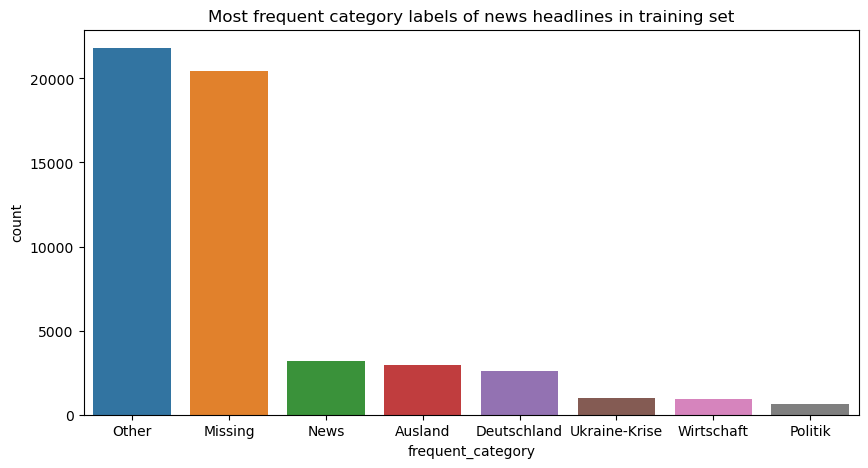

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=train, x='frequent_category', order=train['frequent_category'].value_counts().index)
plt.title('Most frequent category labels of news headlines in training set')
plt.show()

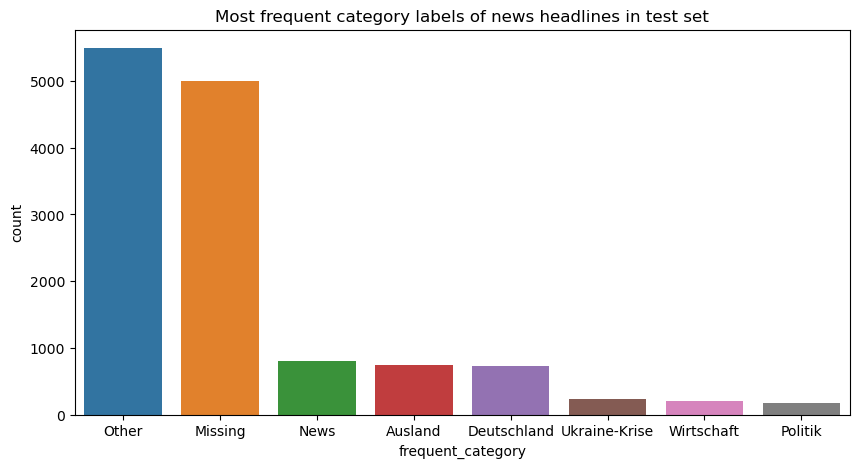

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=test, x='frequent_category', order=test['frequent_category'].value_counts().index)
plt.title('Most frequent category labels of news headlines in test set')
plt.show()

### Store news

In [22]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)